In [85]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import numpy as np

Revenue predicting module

In [86]:
adspend = pd.read_csv('/Users/nalrunyan/Documents/JustDice-Analytics-Engineer-Hiring-Case/data/adspend.csv', parse_dates=['event_date'])
installs = pd.read_csv('/Users/nalrunyan/Documents/JustDice-Analytics-Engineer-Hiring-Case/data/installs.csv', parse_dates=['event_date'])
payouts = pd.read_csv('/Users/nalrunyan/Documents/JustDice-Analytics-Engineer-Hiring-Case/data/payouts.csv', parse_dates=['event_date'])
revenue = pd.read_csv('/Users/nalrunyan/Documents/JustDice-Analytics-Engineer-Hiring-Case/data/revenue.csv', parse_dates=['event_date'])

In [87]:
payouts = payouts.groupby('install_id')['value_usd'].sum().reset_index()
revenue = revenue.groupby('install_id')['value_usd'].sum().reset_index()

In [88]:
adspend = adspend.groupby(['country_id'])['value_usd'].sum().reset_index()

In [89]:
adspend

,country_id,value_usd
0,1,243186.687782
1,17,334.392000
2,109,10053.718011
3,213,501.178006


In [90]:
df = pd.merge(adspend, installs, on=['country_id'], how='right', suffixes=('_adspend', '_installs'))

In [91]:
df = pd.merge(df, payouts, on=['install_id'], how='inner', suffixes=('_adspend', '_payouts'))

In [92]:
df = pd.merge(df, revenue, on=['install_id'], how='left', suffixes=('_adspend', '_revenue'))

In [93]:
df = df.fillna(0)

In [94]:
df.rename({'value_usd_adspend': 'adspend', 'value_usd_payouts': 'payouts', 'value_usd': 'revenue'}, axis=1, inplace=True)

In [95]:
df

,country_id,adspend,install_id,app_id,network_id,event_date,device_os_version,payouts,revenue
0,1,243186.687782,2eba0b65d2c31d2d07cfd254c04df6d205c711dee9b97e...,97,26,2022-12-19,12,16.098362,20.700000
1,1,243186.687782,0daca836eb21c5d66f22d5b7473f10da9f9b2c5d861569...,73,10,2022-12-07,8.0.0,0.357544,0.670000
2,1,243186.687782,43ce7034f5bd46cd6cbf6be236fd7aba76e74c22ccfe40...,256,26,2022-12-06,11,4.206400,22.500000
3,1,243186.687782,bd16c671431964a0ecb5952297c8a0a85fd148a0986f3e...,256,26,2022-12-14,11,4.185057,22.500000
4,1,243186.687782,bd31dddb8cebc84dfdab25327b6cf66f92709c4d4db72f...,174,26,2022-12-26,13,5.024492,24.160000
...,...,...,...,...,...,...,...,...,...
20934,1,243186.687782,b86c58e4b61128270994574b2bb55618c175c8edf27ec5...,94,10,2022-01-01,10,7.998409,24.750000
20935,1,243186.687782,17592ada1886cb77827b31288a24ea8a60e5eb2863a846...,94,10,2022-01-04,11,0.386070,0.980000
20936,109,10053.718011,5dccd421b8892ec41a434766731715156beeaa3a219c2a...,97,60,2022-01-08,11,0.282450,1.400000
20937,1,243186.687782,414229afd514718d4659be8084578bfd1ac7b87f44c328...,104,60,2022-01-08,11,4.899088,6.340000


In [96]:
df = pd.get_dummies(df, columns=['country_id', 'network_id', 'app_id'])

In [80]:
X = df.drop(['install_id', 'revenue', 'device_os_version', 'adspend', 'event_date'], axis=1)
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/Users/nalrunyan/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


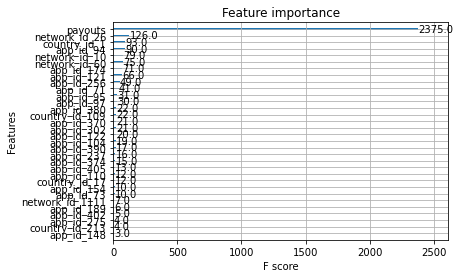

In [81]:
from matplotlib import pyplot
from xgboost import plot_importance
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(X_train, y_train)

plot_importance(model)
pyplot.show()

In [82]:
# print columns: importance
for i in range(len(model.feature_importances_)):
    print(X.columns[i], model.feature_importances_[i])

# print columns: importance


payouts 0.21049657
country_id_1 0.13096176
country_id_17 0.022498948
country_id_109 0.06321748
country_id_213 0.00066426233
network_id_10 0.016322209
network_id_26 0.03810351
network_id_60 0.030216496
network_id_1111 0.027026903
app_id_71 0.022281598
app_id_73 0.008455003
app_id_94 0.021193793
app_id_95 0.01660537
app_id_97 0.012700068
app_id_104 0.029199168
app_id_110 0.0076266555
app_id_120 0.0
app_id_121 0.010958667
app_id_122 0.03593166
app_id_148 0.004565895
app_id_152 0.0
app_id_154 0.004394535
app_id_174 0.018712875
app_id_189 0.0061838776
app_id_237 0.01335139
app_id_256 0.07287443
app_id_275 0.011996599
app_id_302 0.05329401
app_id_321 0.0
app_id_370 0.029746056
app_id_374 0.025043475
app_id_380 0.032804027
app_id_390 0.015702533
app_id_402 0.0021765735
app_id_405 0.0046935864


In [83]:
# metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: %.3f' % mse)
print('R2: %.3f' % r2)

MSE: 38.259
R2: 0.774


Based on the future importance of the trained model and the result metrics, here are some potential business insights that can be derived:

1. Payouts have the highest importance in predicting revenue generation, with a feature importance of 0.210. This indicates that the payout amounts paid to affiliates or publishers for generating specific actions such as app installs have a significant impact on revenue generation.
2. The top five important country IDs in predicting revenue generation are country_id_1, country_id_109, country_id_17, country_id_213, and network_id_26. This suggests that advertisers should focus their ad spending on these countries or networks to maximize revenue generation.
3. The top five important app IDs in predicting revenue generation are app_id_256, app_id_302, app_id_380, app_id_122, and app_id_104. This indicates that advertisers should focus their ad spending on these apps to maximize revenue generation.
4. The R2 score of 0.774 indicates that the model can explain 77.4% of the variance in the revenue generation, which is a reasonably good fit. However, the MSE of 38.259 suggests that there is some error in the model's predictions, and further optimization may be required.
5. Based on the model's insights, advertisers can optimize their ad spending by targeting the top-performing countries, networks, and apps and adjusting their payout amounts to affiliates or publishers for generating specific actions. By doing so, they can maximize their revenue generation and improve the return on their ad spend.

In [101]:
df.event_date = pd.to_datetime(df.event_date)

In [112]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
X = df.drop(['install_id', 'payouts', 'device_os_version', 'adspend'], axis=1).set_index('event_date')


# Define the SARIMA model
model = SARIMAX(X['revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
model_fit = model.fit()

/Users/nalrunyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nalrunyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nalrunyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nalrunyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19632D+00    |proj g|=  7.71295D-02


 This problem is unconstrained.



At iterate    5    f=  4.05927D+00    |proj g|=  2.70406D-02

At iterate   10    f=  3.95351D+00    |proj g|=  6.56252D-04

At iterate   15    f=  3.95327D+00    |proj g|=  7.80542D-03

At iterate   20    f=  3.95220D+00    |proj g|=  2.66812D-03

At iterate   25    f=  3.95218D+00    |proj g|=  1.12459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     40      1     0     0   9.606D-05   3.952D+00
  F =   3.9521755191471177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [121]:
# prediction for next 90 days
predictions = model_fit.predict(start=len(X), end=len(X)+90, dynamic=True)

/Users/nalrunyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [122]:
predictions

20939    8.825430
20940    7.360124
20941    7.633201
20942    7.996108
20943    8.295565
           ...   
21025    7.313496
21026    7.786231
21027    7.895784
21028    7.376406
21029    7.925661
Name: predicted_mean, Length: 91, dtype: float64